In [1]:
import numpy as np
import pandas as pd
import json
from IPython.display import Image
import os
import shutil
import cv2
from matplotlib import pyplot as plt
from keras import backend as K
import tensorflow as tf
import sys

Using TensorFlow backend.


In [2]:
K.repeat(np[:, :, np.newaxis], 7, axis=2)

TypeError: 'module' object is not subscriptable

In [3]:
model = tf.keras.models.load_model("model250_s", compile=False)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 416, 416, 3)]     0         
_________________________________________________________________
rescaling (Rescaling)        (None, 416, 416, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 205, 205, 64)      9472      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 205, 205, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 102, 102, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 192)       602304    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 96, 96, 192)      

In [4]:
img = cv2.imread(f'two_objects/000000000194.jpg')
img = np.expand_dims(img, axis=0)
output = model.predict(img)
print(output.shape)

(1, 169, 7)


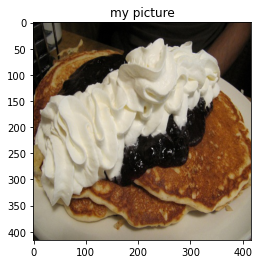

In [40]:
img = cv2.imread('two_objects/000000016360.jpg') 
plt.imshow(img[...,::-1])
plt.title('my picture')
plt.show()

In [5]:
f = open('center.json')

dic = json.load(f)
print(dic['1'])

[16, 16]


In [17]:
13 * 13

169

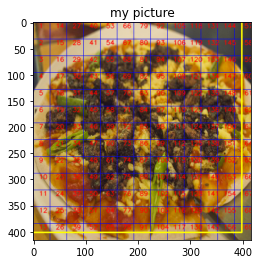

In [31]:
# for 2D
#000000000194
img = cv2.imread('two_objects/000000000194.jpg') 

GRID_SIZE = 32

height, width, channels = img.shape
for x in range(0, width -1, GRID_SIZE):
    cv2.line(img, (x, 0), (x, height), (255, 0, 0), 1, 1)
    cv2.line(img, (0, x), (width, x), (255, 0, 0), 1, 1)

for key in dic.keys():
    org = tuple(np.asarray(dic[key]) - 5)
    ak = cv2.putText(img, str(key), org, cv2.FONT_HERSHEY_SIMPLEX, 
                   0.4, (0, 0, 255), 1, cv2.LINE_AA)
#     ak = cv2.circle(img, dic[key], radius=4, color=(0, 0, 255), thickness=-1)

out_ = np.squeeze(output)
for k in range(0, 169):
    pred = out_[k, :]
    b1 = pred[1:5]
#     print(pred[0])
    if 0.7 < pred[0]:
#         print(k)
#         print(b1[0],b1[1], b1[2], b1[3])
#         print(pred)

        x1 = int((b1[0] - (b1[2]/2)) * 416 )
        y1 = int((b1[1] - (b1[3]/2)) * 416 )
        w1 = int(b1[2] * 416)
        h1 = int(b1[3] * 416)
    
        img = cv2.rectangle(img, [x1, y1, w1, h1], (0,255, 255 ), 2)
        
        

plt.imshow(img[...,::-1])
plt.title('my picture')
plt.show()

0.8822193 0.20671949 0.30358052 0.22009832
0.66634166 0.6946153 0.24200234 0.27030846
0.35590887 0.22354338 0.50001013 0.34997147
0.39666116 0.25033462 0.3256357 0.19635403
0.2871547 0.9918977 0.6047327 0.67726636
0.41682237 0.9971237 0.18225762 0.15242273
0.2805317 0.12797391 0.53567266 0.116500586
0.4166614 0.36656338 0.32300484 0.10300508
0.45878893 0.47030556 0.9983239 0.9935084
0.50607556 0.6414063 0.78127325 0.34407675
0.53753793 0.74030954 0.26984438 0.15511575
0.49622333 0.6301743 0.93737024 0.47965354
0.66323394 0.50562686 0.3080511 0.06912497
0.65066224 0.35804176 0.2630315 0.19412312
0.58680636 0.24161464 0.11878216 0.34477144
0.46959338 0.43345493 0.6004256 0.32880908
0.547206 0.4823549 0.32650656 0.0720267
0.6581341 0.7547717 0.63272 0.31968212
0.783964 0.045098454 0.274727 0.31160313


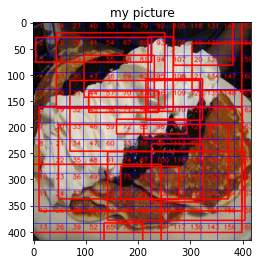

In [29]:
# for 2D
#000000000194
img = cv2.imread('two_objects/000000016360.jpg') 

GRID_SIZE = 32

height, width, channels = img.shape
for x in range(0, width -1, GRID_SIZE):
    cv2.line(img, (x, 0), (x, height), (255, 0, 0), 1, 1)
    cv2.line(img, (0, x), (width, x), (255, 0, 0), 1, 1)

for key in dic.keys():
    org = tuple(np.asarray(dic[key]) - 5)
    ak = cv2.putText(img, str(key), org, cv2.FONT_HERSHEY_SIMPLEX, 
                   0.4, (0, 0, 255), 1, cv2.LINE_AA)
#     ak = cv2.circle(img, dic[key], radius=4, color=(0, 0, 255), thickness=-1)

out_ = np.squeeze(output)
for k in range(0, 169):
    pred = out_[k, :]
    b1 = pred[1:5]
#     print(pred[0])
    if 0.004 < pred[0]:
#         print(k)
        print(b1[0],b1[1], b1[2], b1[3])
#         print(pred)

        x1 = int((b1[0] - (b1[2]/2)) * 416 )
        y1 = int((b1[1] - (b1[3]/2)) * 416 )
        w1 = int(b1[2] * 416)
        h1 = int(b1[3] * 416)
    
        img = cv2.rectangle(img, [x1, y1, w1, h1], (0,0, 255), 2)
        
        

plt.imshow(img[...,::-1])
plt.title('my picture')
plt.show()

(13, 13, 7)
124
[1.         0.734375   0.59495192 0.53125    0.57451923 1.
 0.        ]


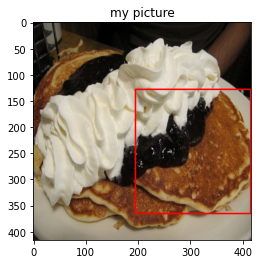

In [42]:
img = cv2.imread('two_objects/000000016360.jpg') 
with open(f'np_label/000000016360.npy', 'rb') as f:
    np_mat = np.load(f)
print(np_mat.shape)
ko = np_mat.reshape(169,7)

for k in range(0, 169):
    if ko[k, 0] > 0 :
        print(k)
        pred = ko[k, :]
        print(pred)
        b1 = pred[1:5]
        
        x1 = int((b1[0] - (b1[2]/2)) * 416 )
        y1 = int((b1[1] - (b1[3]/2)) * 416 )
        w1 = int(b1[2] * 416)
        h1 = int(b1[3] * 416)

        img = cv2.rectangle(img, [x1, y1, w1, h1], (0,0, 255), 2)
        
     
plt.imshow(img[...,::-1])
plt.title('my picture')
plt.show()   

In [1]:
b1 = [0.0143642, 0.5218879, 0.47996426, 0.59402496]
b2 = [0.43269231, 0.50721154, 0.46153846, 0.22596154]

x1, y1, w1, h1 = int((b1[0] - (b1[2]/2)) * 416 ), \
                    int((b1[1] - (b1[3]/2)) * 416 ), \
                    int(b1[2] * 416), \
                    int(b1[3] * 416)

x2, y2, w2, h2 = int((b2[0] - (b2[2]/2)) * 416 ), \
                    int((b2[1] - (b2[3]/2)) * 416 ), \
                    int(b2[2] * 416), \
                    int(b2[3] * 416)
print(x1, y1, w1, h1)
print(x2, y2, w2, h2)

-93 93 199 247
84 164 191 94


-8.183818 -6.2093983 5.8209944 -7.7669787
-5.2701893 -8.462886 3.2937973 -11.755384
-10.859254 -3.380033 1.9582825 -6.4966598
-6.58153 -8.171753 1.343857 -3.2518766
-6.4045224 -6.9033437 -0.024878878 -2.85856
-7.0920625 -4.9334254 -1.1668481 -5.5702434
-7.062517 -5.669514 -0.9090241 -3.9553752
-6.417028 -4.8537145 -1.1710887 -3.2053072
-1.1432918 -4.1340866 0.18659814 -4.390476
-1.5538446 -4.129693 1.8074898 -2.9194362
-2.939157 -6.2341027 -0.11017147 -3.010457
-2.9447713 -7.313149 -1.028652 -5.37395
-4.802555 -9.220066 -1.0362817 -2.6284673
-5.1522865 -9.822128 0.8500936 -7.3431244
-8.429984 -9.81184 6.106741 -3.421365
-6.2072906 -12.71488 -2.6709342 -7.5758047
-3.5462372 -10.428796 3.810799 -6.6602283
-6.143338 -6.744187 2.691084 -2.3196287
-8.586314 -9.515948 4.056819 -5.29132
-5.1429152 -8.857785 0.71702987 -4.895702
-6.6989393 -8.586653 0.43944404 -5.1597285
-6.228214 -6.469421 0.8105389 -1.1576059
-3.2359395 -2.8975868 1.4638606 -2.6634524
-1.5430902 -5.5721574 0.3131267 -0.65230

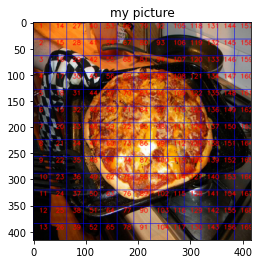

In [14]:
#for cuboid 
img = cv2.imread('two_objects/000000001536.jpg') 

GRID_SIZE = 32

height, width, channels = img.shape
for x in range(0, width -1, GRID_SIZE):
    cv2.line(img, (x, 0), (x, height), (255, 0, 0), 1, 1)
    cv2.line(img, (0, x), (width, x), (255, 0, 0), 1, 1)

for key in dic.keys():
    org = tuple(np.asarray(dic[key]) - 5)
    ak = cv2.putText(img, str(key), org, cv2.FONT_HERSHEY_SIMPLEX, 
                   0.4, (0, 0, 255), 1, cv2.LINE_AA)
#     ak = cv2.circle(img, dic[key], radius=4, color=(0, 0, 255), thickness=-1)

out_ = output[0, ...]
for k in range(0, 13):
    for l in range(0, 13):
        pred = out_[k, l, :]
        b1 = pred[1:5]
        print(b1[0],b1[1], b1[2], b1[3])
#         print(x1, y1, w1, h1)
        x1, y1, w1, h1 = int((b1[0] - (b1[2]/2)) * 416 ), \
                    int((b1[1] - (b1[3]/2)) * 416 ), \
                    int(b1[2] * 416), \
                    int(b1[3] * 416)
        img = cv2.rectangle(img, [x1, y1, w1, h1], (0,0, 255), 2)
        
        

plt.imshow(img[...,::-1])
plt.title('my picture')
plt.show()

In [1]:
13*13*(2+1*5)

1183

In [5]:
cap = open('annotations/instances_train2017.json')

cap = json.load(cap)
print(cap.keys())
print(cap['annotations'][0])

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])
{'segmentation': [[239.97, 260.24, 222.04, 270.49, 199.84, 253.41, 213.5, 227.79, 259.62, 200.46, 274.13, 202.17, 277.55, 210.71, 249.37, 253.41, 237.41, 264.51, 242.54, 261.95, 228.87, 271.34]], 'area': 2765.1486500000005, 'iscrowd': 0, 'image_id': 558840, 'bbox': [199.84, 200.46, 77.71, 70.88], 'category_id': 58, 'id': 156}


In [39]:
print(cap['images'][0])
print()
print(cap['annotations'][0])
print()
print(cap['categories'][0])

{'license': 3, 'file_name': '000000391895.jpg', 'coco_url': 'http://images.cocodataset.org/train2017/000000391895.jpg', 'height': 360, 'width': 640, 'date_captured': '2013-11-14 11:18:45', 'flickr_url': 'http://farm9.staticflickr.com/8186/8119368305_4e622c8349_z.jpg', 'id': 391895}

{'segmentation': [[239.97, 260.24, 222.04, 270.49, 199.84, 253.41, 213.5, 227.79, 259.62, 200.46, 274.13, 202.17, 277.55, 210.71, 249.37, 253.41, 237.41, 264.51, 242.54, 261.95, 228.87, 271.34]], 'area': 2765.1486500000005, 'iscrowd': 0, 'image_id': 558840, 'bbox': [199.84, 200.46, 77.71, 70.88], 'category_id': 58, 'id': 156}

{'supercategory': 'person', 'id': 1, 'name': 'person'}


In [29]:
temp = set()
for dic in cap['categories']:
    if dic['supercategory'] == 'food':
        if dic['name'] in ['pizza', 'sandwich']:
            print(temp.add(dic['id']))

None
None


In [49]:
for dic in cap['categories']:
    if dic['name'] == 'sandwich':
        print(dic)
        break

{'supercategory': 'food', 'id': 54, 'name': 'sandwich'}


In [30]:
temp

{54, 59}

In [102]:
new_ann = []
count = 1
for ann in cap['annotations']:
    if ann['category_id'] in [54, 59]:
        _temp = ann.copy()
        new_ann.append(_temp)
        count += 1
        
print(count)

10195


In [54]:
imgs = []
count = 0
for img in cap['images']:
    for ann in new_ann:
        if img['id'] == ann['image_id']:
            count += 1
            _temp = {}
            _temp['image_id'] = img['id']
            _temp['bbox'] = ann['bbox']
            _temp['file_name'] = img['file_name']
            _temp['height'] = img['height']
            _temp['width'] = img['width']
            names = { 54: 'sandwich',  59 : 'pizza'}
            _temp['name'] = names[ann['category_id']]
            
            imgs.append(_temp)
print(count)

10194


In [55]:
len(imgs)

10194

In [56]:
imgs[0]

{'image_id': 570465,
 'bbox': [2.16, 341.93, 202.78, 79.82],
 'file_name': '000000570465.jpg',
 'height': 480,
 'width': 640,
 'name': 'pizza'}

In [91]:
for k in new_img:
    if k['file_name'] == '000000570465.jpg':
        print(k)

{'image_id': 570465, 'bbox': [1, 296, 132, 69], 'file_name': '000000570465.jpg', 'height': 480, 'width': 640, 'name': 'pizza'}
{'image_id': 570465, 'bbox': [212, 286, 117, 71], 'file_name': '000000570465.jpg', 'height': 480, 'width': 640, 'name': 'pizza'}
{'image_id': 570465, 'bbox': [211, 179, 46, 52], 'file_name': '000000570465.jpg', 'height': 480, 'width': 640, 'name': 'pizza'}
{'image_id': 570465, 'bbox': [152, 150, 44, 55], 'file_name': '000000570465.jpg', 'height': 480, 'width': 640, 'name': 'pizza'}
{'image_id': 570465, 'bbox': [233, 232, 81, 65], 'file_name': '000000570465.jpg', 'height': 480, 'width': 640, 'name': 'pizza'}
{'image_id': 570465, 'bbox': [161, 211, 96, 43], 'file_name': '000000570465.jpg', 'height': 480, 'width': 640, 'name': 'pizza'}
{'image_id': 570465, 'bbox': [93, 213, 63, 51], 'file_name': '000000570465.jpg', 'height': 480, 'width': 640, 'name': 'pizza'}
{'image_id': 570465, 'bbox': [117, 347, 77, 64], 'file_name': '000000570465.jpg', 'height': 480, 'width':

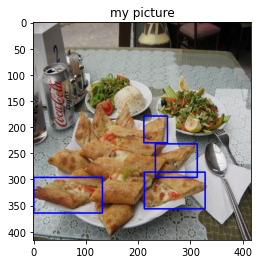

In [93]:
img = cv2.imread('two_objects/000000570465.jpg') 
ak = cv2.rectangle(img, [1, 296, 132, 69], (255,0,0), 2)
ak = cv2.rectangle(img, [212, 286, 117, 71],(255,0,0), 2)
ak = cv2.rectangle(img, [211, 179, 46, 52], (255,0,0), 2)
ak = cv2.rectangle(img, [233, 232, 81, 65], (255,0,0), 2)
plt.imshow(ak[...,::-1])
plt.title('my picture')
plt.show()

In [66]:
test = set()
for k in imgs:
    test.add(k['file_name'])

In [83]:
print(len(imgs), len(test))

10194 5451


In [104]:
uniq_arr = []
for uniq in test:
    bboxs = []
    yolo_boxes = []
    temp = {}
    for k in yolo_ann:
        if uniq == k['file_name']:
            temp = k.copy()
            bboxs.append(k['bbox'])
            yolo_boxes.append(k['yolo_norm_bbox'])
    temp['bboxs'] = bboxs
    temp['yolo_bboxs'] = yolo_boxes
    uniq_arr.append(temp)

In [105]:
len(uniq_arr)

5451

In [106]:
uniq_arr[0]

{'image_id': 549112,
 'bbox': [142, 143, 196, 117],
 'file_name': '000000549112.jpg',
 'height': 426,
 'width': 640,
 'name': 'sandwich',
 'yolo_norm_bbox': [0.5769230769230769,
  0.484375,
  0.47115384615384615,
  0.28125],
 'bboxs': [[22, 182, 242, 157], [142, 143, 196, 117]],
 'yolo_bboxs': [[0.34375,
   0.6262019230769231,
   0.5817307692307693,
   0.37740384615384615],
  [0.5769230769230769, 0.484375, 0.47115384615384615, 0.28125]]}

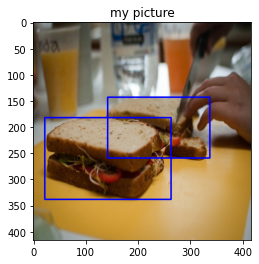

In [109]:
img = cv2.imread('two_objects/000000549112.jpg') 
ak = cv2.rectangle(img, [22, 182, 242, 157], (255,0,0), 2)
ak = cv2.rectangle(img, [142, 143, 196, 117],(255,0,0), 2)
plt.imshow(ak[...,::-1])
plt.title('my picture')
plt.show()

In [111]:
with open('two_ann.json', 'w', encoding='utf-8') as f:
    json.dump(uniq_arr, f, ensure_ascii=False, indent=4)

In [112]:
ann = open('two_ann.json')
ann = json.load(ann)
print(ann[0])

{'image_id': 549112, 'bbox': [142, 143, 196, 117], 'file_name': '000000549112.jpg', 'height': 426, 'width': 640, 'name': 'sandwich', 'yolo_norm_bbox': [0.5769230769230769, 0.484375, 0.47115384615384615, 0.28125], 'bboxs': [[22, 182, 242, 157], [142, 143, 196, 117]], 'yolo_bboxs': [[0.34375, 0.6262019230769231, 0.5817307692307693, 0.37740384615384615], [0.5769230769230769, 0.484375, 0.47115384615384615, 0.28125]]}


In [84]:
imgs[0]

{'image_id': 570465,
 'bbox': [2.16, 341.93, 202.78, 79.82],
 'file_name': '000000570465.jpg',
 'height': 480,
 'width': 640,
 'name': 'pizza'}

In [ ]:
new_img = []
for dic in imgs:
    file_name = dic['file_name']
    imageToPredict = cv2.imread(f'train2017/{file_name}')
#     print(imageToPredict.shape)

    xb, yb, xw, ym = dic["bbox"]

    y_ = imageToPredict.shape[0]
    x_ = imageToPredict.shape[1]
#     print(f"Shape: {x_}, {y_}")
    x_scale = 416/x_
    y_scale = 416/y_
#     print(x_scale,y_scale)

    img = cv2.resize(imageToPredict,(416,416));

    temp = dic.copy()
    
    x = int(np.round(xb*x_scale))
    y = int(np.round(yb*y_scale))
    xmax= int(np.round  (xw*(x_scale)))
    ymax= int(np.round(ym*y_scale))



    
    temp['bbox'] = [x, y, xmax, ymax]

    new_img.append(temp)
    cv2.imwrite(f'two_objects/{file_name}',img)

In [89]:
len(new_img)

10194

In [94]:
yolo_ann = []
for dic in new_img:
    temp = dic.copy()
    
    arr = temp["bbox"]
    x_center = ((arr[0] + arr[0] + arr[2] ) / 2 ) / 416
    y_center = ((arr[1] + arr[1] + arr[3] ) / 2 ) / 416
    
    width = arr[2] / 416
    height = arr[3] / 416
 
    temp['yolo_norm_bbox'] = [x_center, y_center, width, height] 
    yolo_ann.append(temp)

In [96]:
yolo_ann[0]

{'image_id': 570465,
 'bbox': [1, 296, 132, 69],
 'file_name': '000000570465.jpg',
 'height': 480,
 'width': 640,
 'name': 'pizza',
 'yolo_norm_bbox': [0.16105769230769232,
  0.7944711538461539,
  0.3173076923076923,
  0.1658653846153846]}

In [113]:
ann[0]

{'image_id': 549112,
 'bbox': [142, 143, 196, 117],
 'file_name': '000000549112.jpg',
 'height': 426,
 'width': 640,
 'name': 'sandwich',
 'yolo_norm_bbox': [0.5769230769230769,
  0.484375,
  0.47115384615384615,
  0.28125],
 'bboxs': [[22, 182, 242, 157], [142, 143, 196, 117]],
 'yolo_bboxs': [[0.34375,
   0.6262019230769231,
   0.5817307692307693,
   0.37740384615384615],
  [0.5769230769230769, 0.484375, 0.47115384615384615, 0.28125]]}

In [8]:
f = open('two_ann.json')
grid_i = open('grid_i.json')
yolo_norm_center = open('yolo_norm_center.json')

dic = json.load(f)
grid_i = json.load(grid_i)
yolo_norm_center = json.load(yolo_norm_center)
# Objt (0, 0) (25, 18, 24, 10) 1
for a in dic:
#     print(a)
    _temp_arr = np.zeros((13, 13, 7), dtype=np.float)
    for box in a['yolo_bboxs']:
        x1 = box[0]
        y1 = box[1]
        width = box[2]
        height = box[3]

        name = {'pizza' : (1, 0), 'sandwich': (0, 1)}

        clas = name[a["name"]]
        _min = 100 
        _min_grid = (0,0)
        

        for key in yolo_norm_center.keys():
            x2 = yolo_norm_center[key][0]
            y2 = yolo_norm_center[key][1]

            dist = np.sqrt((y2-y1)**2 + (x2-x1)**2)
            if dist < _min:
                _min = dist
                _min_grid = grid_i[key]

        _temp_arr[_min_grid[0], _min_grid[1], :] = np.array([1 , x1 ,y1, width, height, clas[0], clas[1]], dtype=np.float)

        np_name =  a['file_name'].split(".")[0]

        with open(f"np_label/{np_name}.npy", 'wb') as f:
            np.save(f, _temp_arr)

#         print(np_name)
#         print(_temp_arr[_min_grid[0], _min_grid[1], :])

#         print(_min_grid)
#         print(dist)
#     break

print('finish')

# print(dic[:4])

finish


(416, 416, 3)


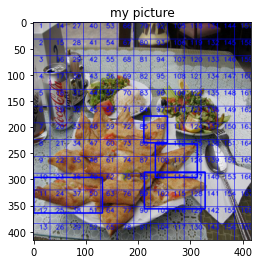

In [17]:
img = cv2.imread('two_objects/000000570465.jpg') 
dic = open('center.json')
dic = json.load(dic)

GRID_SIZE = 32
print(img.shape)
height, width, channels = img.shape
for x in range(0, width -1, GRID_SIZE):
    cv2.line(img, (x, 0), (x, height), (255, 0, 0), 1, 1)
    cv2.line(img, (0, x), (width, x), (255, 0, 0), 1, 1)

for key in dic.keys():
    org = tuple(np.asarray(dic[key]) - 5)
    ak = cv2.putText(img, str(key), org, cv2.FONT_HERSHEY_SIMPLEX, 
                   0.4, (255, 0, 0), 1, cv2.LINE_AA)
#     ak = cv2.circle(img, dic[key], radius=4, color=(0, 0, 255), thickness=-1)

ak = cv2.rectangle(img, [1, 296, 132, 69], (255,0,0), 2)
ak = cv2.rectangle(img, [212, 286, 117, 71],(255,0,0), 2)
ak = cv2.rectangle(img, [211, 179, 46, 52], (255,0,0), 2)
ak = cv2.rectangle(img, [233, 232, 81, 65], (255,0,0), 2)
plt.imshow(ak[...,::-1])
plt.title('my picture')
plt.show()

In [18]:
with open(f'np_label/000000570465.npy', 'rb') as f:
    np_mat = np.load(f)
print(np_mat.shape)
k = np_mat.reshape(169,7)
for i in range(0, 169):
    if (k[i, 0] == 1):
        print(i+1)
        print(k[i, :])


(13, 13, 7)
37
[1.         0.16105769 0.79447115 0.31730769 0.16586538 1.
 0.        ]
46
[1.         0.23076923 0.49759615 0.07692308 0.17788462 1.
 0.        ]
47
[1.         0.29927885 0.57331731 0.15144231 0.12259615 1.
 0.        ]
58
[1.         0.32091346 0.45793269 0.10817308 0.17067308 1.
 0.        ]
61
[1.         0.32331731 0.62379808 0.52163462 0.26201923 1.
 0.        ]
64
[1.         0.37379808 0.91105769 0.18509615 0.15384615 1.
 0.        ]
71
[1.         0.41826923 0.42668269 0.10576923 0.13221154 1.
 0.        ]
73
[1.         0.41826923 0.55528846 0.22115385 0.17307692 1.
 0.        ]
75
[1.         0.41346154 0.76802885 0.24038462 0.13221154 1.
 0.        ]
86
[1.         0.50240385 0.55889423 0.23076923 0.10336538 1.
 0.        ]
87
[1.         0.47836538 0.67788462 0.25961538 0.15865385 1.
 0.        ]
98
[1.         0.5625     0.49278846 0.11057692 0.125      1.
 0.        ]
113
[1.         0.65745192 0.63581731 0.19471154 0.15625    1.
 0.        ]
115
[1.     

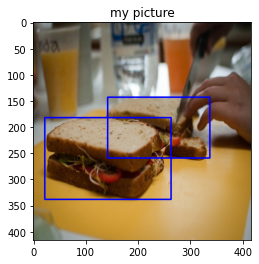

In [ ]:
yolo_ann = open("two_ann.json")
yolo_ann = json.load(yolo_ann)

for img in os.listdir("two_objects/")[5:]:
    if img.endswith(".jpg"):
        filename = img.split(".")[0]
        print(filename)
        with open(f'np_label/{filename}.npy', 'rb') as f:
            np_mat = np.load(f)
            
        front_facet = np_mat[:,:,0]
        i, j = np.where(front_facet == 1)
        for yolo_fmt in yolo_ann:
            if yolo == img:
                print(yolo_fmt['bbox'])
                print(yolo_fmt['yolo_norm_bbox'])
        print(i, j)
        break
    break

(416, 416, 3)


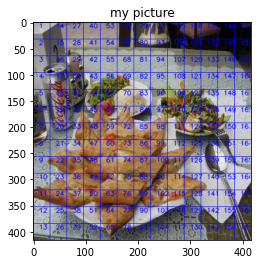

In [8]:
img = cv2.imread('two_objects/000000570465.jpg') 
dic = open('center.json')
dic = json.load(dic)

GRID_SIZE = 32
print(img.shape)
height, width, channels = img.shape
for x in range(0, width -1, GRID_SIZE):
    cv2.line(img, (x, 0), (x, height), (255, 0, 0), 1, 1)
    cv2.line(img, (0, x), (width, x), (255, 0, 0), 1, 1)

for key in dic.keys():
    org = tuple(np.asarray(dic[key]) - 5)
    ak = cv2.putText(img, str(key), org, cv2.FONT_HERSHEY_SIMPLEX, 
                   0.4, (255, 0, 0), 1, cv2.LINE_AA)
#     ak = cv2.circle(img, dic[key], radius=4, color=(0, 0, 255), thickness=-1)

plt.imshow(ak[...,::-1])
plt.title('my picture')
plt.show()

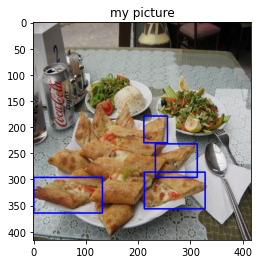

In [9]:
img = cv2.imread('two_objects/000000570465.jpg') 
ak = cv2.rectangle(img, [1, 296, 132, 69], (255,0,0), 2)
ak = cv2.rectangle(img, [212, 286, 117, 71],(255,0,0), 2)
ak = cv2.rectangle(img, [211, 179, 46, 52], (255,0,0), 2)
ak = cv2.rectangle(img, [233, 232, 81, 65], (255,0,0), 2)
plt.imshow(ak[...,::-1])
plt.title('my picture')
plt.show()

In [16]:
with open(f'np_label/000000030769.npy', 'rb') as f:
    np_mat = np.load(f)
            
front_facet = np_mat[:,:,0]
print(front_facet.shape)

(13, 13)


In [17]:
front_facet
# down x and side-> y 

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [51]:
np.random.seed(0)
depth_mult_mat= np.repeat(front_facet[:, :, np.newaxis], 7, axis=2)
y_pred = np.random.randn(13, 13, 7)
k = y_pred * depth_mult_mat

print(y_pred.shape)
print(k[0, 9, :])
y_pred[5, 9, :]

(13, 13, 7)
[-0.  0. -0. -0.  0. -0.  0.]


array([ 0.28427967,  1.74266878, -0.22260568, -0.91307922, -1.68121822,
       -0.88897136,  0.24211796])

In [36]:
b[5, 9, :]

array([1., 1., 1., 1., 1., 1., 1.])

(13, 13, 7)
[-0.  0. -0. -0.  0. -0.  0.]


array([ 0.28427967,  1.74266878, -0.22260568, -0.91307922, -1.68121822,
       -0.88897136,  0.24211796])

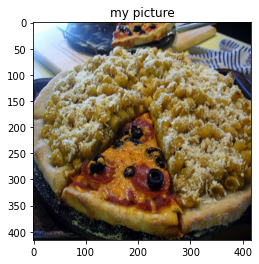

In [18]:
img = cv2.imread('two_objects/000000030769.jpg') 
plt.imshow(img[...,::-1])
plt.title('my picture')
plt.show()

In [34]:
def iou_3d(b1, b2):
    b1 = b1[:, :, 1: 5]
    b2 = b2[:, :, 1: 5]
    x1, y1, w1, h1 = (b1[:, :, 0] - (b1[:, :, 2] / 2)) * 416 , \
                     (b1[:, :, 1] - (b1[:, :, 3] / 2)) * 416 , \
                     b1[:, :, 2] * 416, \
                     b1[:, :, 3] * 416
    
    x2, y2, w2, h2 = (b2[:, :, 0] - (b2[:, :, 2] / 2)) * 416 , \
                     (b2[:, :, 1] - (b2[:, :, 3] / 2)) * 416 , \
                     b2[:, :, 2] * 416, \
                     b2[:, :, 3] * 416
    
    
    xi1 = np.maximum(x1, x2)
    yi1 = np.maximum(y1, y2)
    xi2 = np.minimum(w1 + x1, w2 + x2)
    yi2 = np.minimum(h1 + y1 , h2 + y2)

#     print(np.sum(xi1))
#     print(np.sum(yi1))
#     print(np.sum(xi2))
#     print(np.sum(yi2))
    inter_area = (xi2 - xi1) * (yi2 - yi1)

    
    box1_area = w1 * h1
    box2_area = w2 * h2

    union_area = (box1_area + box2_area) - inter_area

    iou = inter_area / (union_area + 1e-25)
    
    return iou

In [7]:
iou_3d(np_mat, out_box).shape

(13, 13)

In [3]:
with open(f'np_label/000000012930.npy', 'rb') as f:
    np_mat = np.load(f)
            
front_facet = np_mat[:,:,0]
# print(front_facet)
# print(np_mat[3, 7, :])
# print(np_mat[9, 8, :])
out_box = np.random.randn(64, 13, 13, 7)
out_box[0, 3, 7, :] = [1., 0.50528846, 0.78774038, 0.44711538, 0.61778846, 1., 0.]
out_box[0, 9, 8, :] = [1., 0.81754808, 0.53341346, 0.49759615, 0.58894231, 0., 1.]
f_f = out_box[:,:,0]
# iou_3d(np_mat, out_box)

In [39]:
def custom_loss(y_true, y_pred):
    
    front_facet = y_true[:,:,0]
    depth_mult_mat= np.repeat(front_facet[:, :, np.newaxis], 7, axis=2)
    
    y_pred = y_pred * depth_mult_mat
    print(y_pred[:,:,0])
    
    y_true_class = y_true[:, :, 5 : 7]
    y_pred_class = y_pred[:, :, 5 : 7]
    
    y_true_xy = y_true[:, :, 1 : 3]
    y_pred_xy = y_pred[:, :, 1 : 3]
    
    y_true_wh = y_true[:, :, 3 : 5]
    y_pred_wh = y_pred[:, :, 3 : 5]
    
    y_true_conf = y_true[:, :, 0]
    y_pred_conf = y_pred[:, :, 0]
    
    cls_loss = np.sum(np.square(y_true_class - y_pred_class), axis=-1)
    xy_loss = np.sum(np.square(y_true_xy - y_true_xy), axis=-1)
    wh_loss = np.sum(np.square(np.sqrt(y_true_wh) - np.sqrt(y_pred_wh)), axis = -1)
    
    
    iou = iou_3d(y_true, y_pred)
    conf_loss = np.square(y_true_conf*iou - y_pred_conf)
    
    print(cls_loss.shape, xy_loss.shape, wh_loss.shape, conf_loss.shape)
    
    total_loss = xy_loss + wh_loss + conf_loss + cls_loss
    
    return np.sum(total_loss)
    

In [40]:
custom_loss(np_mat, out_box)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(13, 13) (13, 13) (13, 13) (13, 13)


0.8468799160641867

In [33]:
a = np.array([1.0, 3.6, 4.2, -0.0])
a.astype(int)

array([1, 3, 4, 0])

In [5]:

def iou_3d(b1, b2):
    b1 = b1[..., 1: 5]
    b2 = b2[..., 1: 5]
    x1, y1, w1, h1 = (b1[..., 0] - (b1[..., 2] / 2)) * 416 , \
                     (b1[..., 1] - (b1[..., 3] / 2)) * 416 , \
                     b1[..., 2] * 416, \
                     b1[..., 3] * 416
    
    x2, y2, w2, h2 = (b2[..., 0] - (b2[..., 2] / 2)) * 416 , \
                     (b2[..., 1] - (b2[..., 3] / 2)) * 416 , \
                     b2[..., 2] * 416, \
                     b2[..., 3] * 416
    
    
    xi1 = K.maximum(x1, x2)
    yi1 = K.maximum(y1, y2)
    xi2 = K.minimum(w1 + x1, w2 + x2)
    yi2 = K.minimum(h1 + y1 , h2 + y2)

#     print(np.sum(xi1))
#     print(np.sum(yi1))
#     print(np.sum(xi2))
#     print(np.sum(yi2))
    inter_area = (xi2 - xi1) * (yi2 - yi1)

    
    box1_area = w1 * h1
    box2_area = w2 * h2

    union_area = (box1_area + box2_area) - inter_area

    iou = inter_area / (union_area + 1e-25)
    
    return iou

def custom_loss(y_true, y_pred):
    
   
    
#     tf.print(f"y_true: {y_true.shape}, y_pred: {y_pred.shape}", output_stream=sys.stdout)

    front_facet = y_true[...,0]
#     print(y_pred[:, :, 0])
    depth_mult_mat= K.repeat_elements(front_facet[..., np.newaxis], 7, axis=-1)
    y_pred = y_pred * depth_mult_mat
    y_pred = tf.nn.relu(y_pred)
#     print(f"y_true: {y_pred[0,3, 7, :]}")
    
    
    y_true_class = y_true[..., 5 : 7]
    y_pred_class = y_pred[..., 5 : 7]
    
    
    y_true_xy = y_true[..., 1 : 3]
    y_pred_xy = y_pred[..., 1 : 3]
    
    
    
    y_true_wh = y_true[..., 3 : 5]
    y_pred_wh = y_pred[..., 3 : 5]
    
    
    y_true_conf = y_true[..., 0]
    y_pred_conf = y_pred[..., 0]
    
  
    cls_loss = K.sum(K.square(y_true_class - y_pred_class), axis= -1)
    xy_loss = K.sum(K.square(y_true_xy - y_pred_xy), axis= -1)
    wh_loss = K.sum(K.square(K.sqrt(y_true_wh) - K.sqrt(y_pred_wh)), axis= -1)

    
    iou = iou_3d(y_true, y_pred)
    
    conf_loss = K.square( (y_true_conf*iou) - y_pred_conf)
    
    
    
    total_loss = xy_loss + wh_loss + conf_loss + cls_loss
    
    total_loss = K.sum(total_loss, axis= (-1, -2))
    
    print(total_loss)
    
    return total_loss


custom_loss(tf.constant(np.expand_dims(np_mat, axis=0)), tf.constant(out_box))

Tensor("Sum_2:0", shape=(1,), dtype=float64)


<tf.Tensor 'Sum_2:0' shape=(1,) dtype=float64>

<class 'numpy.ndarray'> (416, 416, 3)


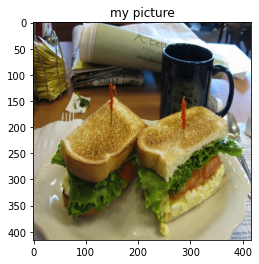

In [51]:
img = cv2.imread('two_objects/000000012930.jpg')
print(type(img), img.shape)
plt.imshow(img[...,::-1])
plt.title('my picture')
plt.show()

In [4]:
count  = 0
total_files = len(os.listdir("two_objects"))

input_ = np.empty((total_files, 416, 416, 3))
output_ = np.empty((total_files, 13, 13, 7))

for file in os.listdir("two_objects"):
    if file.endswith(".jpg"):
        filename = file.split(".")[0]
        
        img = cv2.imread(f'two_objects/{filename}.jpg')
        
        with open(f'np_label/{filename}.npy', 'rb') as f:
            np_mat = np.load(f)
            
        input_[count, :, :, :] = img
        output_[count, :, :, :] = np_mat
        print ("\r", f"total left: {total_files}", end="")
        total_files -= 1

 total left: 1000total left: 3612

In [50]:
len(os.listdir("two_objects"))

5451

In [ ]:
sudo add-apt-repository ppa:deadsnakes/ppa
sudo apt-get update
sudo apt-get install python3.6

In [5]:
np.random.seed(0)
a = np.random.randn(64,)
z = np.zeros((64,))
p = a * z
print(a[1])
print(z[1])
print(p[1])

0.4001572083672233
0.0
0.0


In [13]:
a = tf.nn.sigmoid([1, .3, .4 , .6, .7, 0, 1])
a

<tf.Tensor: shape=(7,), dtype=float32, numpy=
array([0.73105854, 0.5744425 , 0.59868765, 0.6456563 , 0.66818774,
       0.5       , 0.7310586 ], dtype=float32)>

In [14]:
np.sum(a)

4.4490914

In [ ]:
first_layer_activation = [0]